![sutd](imgs/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Homework 2**

<center>**Due 5 July 2019, 5pm** <center>

**Write your student ID and name**

ID: 1002195

Name: Hao Weining

Students with whom you have discussed (if any):

### Requirements:
- Use Python to complete this homework.
- Please list students with whom you have discussed (if any).
- Follow the honor code strictly.
- Submit this ipynb file on eDimension before the deadline.

## Introduction
Constituency parsing aims to extract a constituency-based parse tree from a sentence that represents its syntactic structure according to a phrase structure grammar.

A typical constituency parse tree is shown below:

![tree](imgs/parse_tree.png)

$S$ is a distinguished start symbol, node labels such as $NP$(noun phrase), $VP$(verb phrase) are non-terminal symbols, leaf labels such as "a", "banana" are terminal symbols.

In this homework, we will be implementing a constituency parser based on probabilistic context-free grammars (PCFGs) and evaluate its performance.

## Dataset

We will be using a version of the [Penn Treebank](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.8216&rep=rep1&type=pdf) released in [NLTK corpora](http://www.nltk.org/nltk_data/) to induce PCFGs and evaluate our algorithm. 

The preprocessing code has been provided, **do not make any changes to the texts and code unless you are requested to do so.** Run the code below to load the training and test sets as Python lists, it will take ~1 minute.

Since we will not be tuning hyper-parameters for this homework, there will be no need for a development set.

In [1]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/haoweining/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [2]:
from util import get_train_test_data

In [3]:
#cnf_trees_train: training set, a list of parse trees
#cnf_trees_test: test set, a list of parse trees
cnf_trees_train, cnf_trees_test = get_train_test_data()

Each parse tree is of the [nltk.tree.Tree](https://www.nltk.org/_modules/nltk/tree.html) type and has been converted to the Chomsky normal form. Let us look at a sample parse tree in the training set:

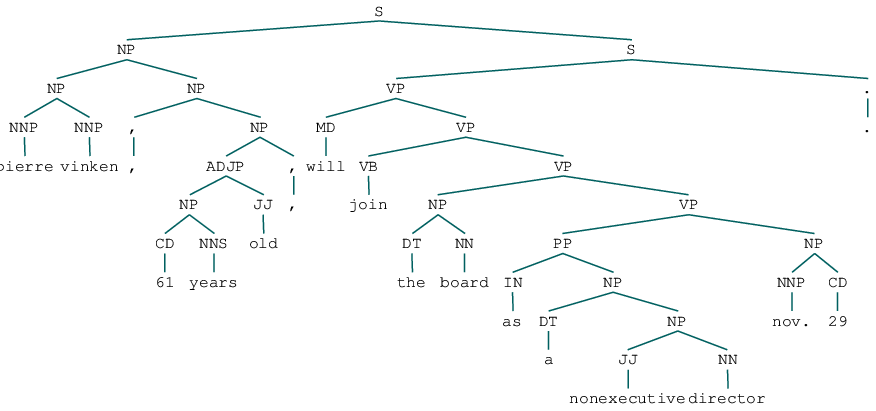

In [4]:
cnf_trees_train[0]

## PCFG

A probabilistic context-free grammar consists of:
- A context-free grammar $G=(N, \ \Sigma, \ S, \ R)$ where $N$ is a finite set of non-terminal symbols, $\Sigma$ is a finite set of terminal symbols, $R$ is a finite set of rules (e.g., $NP \rightarrow NP \ PP$), $S \in N$ is the start symbol.
- One parameter $q(A \rightarrow \beta)$ for each rule $A \rightarrow \beta$ in $R$. Since the grammar is in Chomsky normal form, there are only two types of rules: $A \rightarrow B \ C$ and $A \rightarrow \alpha$, where $A$, $B$, $C \in N$, $\alpha \in \Sigma$.

We can estimate the parameter $q(A \rightarrow \beta)$ using maximum likelihood estimation:

$$q_{MLE}(A \rightarrow \beta) = \frac {count(A \rightarrow \beta)}{count(A)}$$
where $count(A \rightarrow \beta)$ refers to the number of times we can observe the rule $A \rightarrow \beta$ in all the parse trees in the training set, and  $count(A)$  refers to the number of times we can see the non-terminal symbol $A$.

### Task 1 (6 points)

Starting from a single parse tree:
- First of all, let us only consider the first parse tree in the training set. List down all the unique grammar rules, unique non-terminal symbols, and unique terminal symbols that appear in this first parse tree from the training set.

Hint: [nltk.tree.Tree](https://www.nltk.org/_modules/nltk/tree.html) class provides many methods to get features of a tree. **Don't make any changes to the trees.**

In [5]:
### Check the methods of a parse tree of nltk.tree.Tree type
# help(cnf_trees_train[0])

In [60]:
#Write your code here
t = cnf_trees_train[0]
print('All Unique Rules: ')
print(set(t.productions()))

print('\nAll Unique Terminal Symbols')
print(set(t.leaves()))

nonterm = [i.label() for i in t.subtrees()]
print('\nAll Unique Non-Terminal Symbols')
print(set(nonterm))

All Unique Rules: 
{NP -> DT NP, VP -> VB VP, NP -> , NP, NN -> 'director', NN -> 'board', . -> '.', NP -> CD NNS, NNP -> 'nov.', VB -> 'join', NNP -> 'vinken', DT -> 'the', NP -> NNP CD, NP -> JJ NN, S -> VP ., VP -> PP NP, CD -> '29', NP -> NNP NNP, , -> ',', IN -> 'as', DT -> 'a', NP -> NP NP, CD -> '61', NNS -> 'years', JJ -> 'nonexecutive', ADJP -> NP JJ, NP -> ADJP ,, VP -> MD VP, VP -> NP VP, NP -> DT NN, JJ -> 'old', S -> NP S, MD -> 'will', NNP -> 'pierre', PP -> IN NP}

All Unique Terminal Symbols
{'pierre', 'join', 'director', 'nonexecutive', 'nov.', '61', 'the', 'years', 'vinken', ',', 'a', 'old', 'will', '29', 'board', 'as', '.'}

All Unique Non-Terminal Symbols
{'VB', 'DT', 'PP', 'MD', ',', 'CD', 'JJ', 'IN', 'ADJP', 'NNS', 'NP', 'NNP', 'NN', 'VP', 'S', '.'}


There is an underlying PCFG used for parsing the sentences in the training set. To find out this PCFG, what we can do is to visit each parse tree that appears in the training set, and collect some useful information from each parse tree. Let us start with the following:
- Obtain all the grammar rules, non-terminal symbols, and terminal symbols.
- Show the numbers of unique non-terminal symbols, unique terminal symbols, and unique grammar rules. 
- List 10 most frequent grammar rules.

In [61]:
#Write your code here
import operator
all_rules = {}
all_nonterm = {}
all_term = {}
for t in cnf_trees_train:
    tmp_rule = t.productions()
    for k in tmp_rule:
        try:
            all_rules[k] += 1
        except:
            all_rules[k] = 1
    tmp_nonterm = [i.label() for i in t.subtrees()]
    for k in tmp_nonterm:
        try:
            all_nonterm[k] += 1
        except:
            all_nonterm[k] = 1
    tmp_term = t.leaves()
    for k in tmp_term:
        try:
            all_term[k] += 1
        except:
            all_term[k] = 1
list_rules = sorted(all_rules.items(), key=operator.itemgetter(1))
print('Number of Unique Grammar Rules: ', len(list_rules))
print('10 Most Frequent Grammar Rules:')
print(list_rules[-10:])
print('\n')

list_nonterm = sorted(all_nonterm.items(), key=operator.itemgetter(1))
print('Number of Unique Non-terminal Nodes: ', len(list_nonterm))
print('10 Most Frequent Non-terminal Nodes:')
print(list_nonterm[-10:])
print('\n')

list_term = sorted(all_term.items(), key=operator.itemgetter(1))
print('Number of Unique Terminal Nodes: ', len(list_term))
print('10 Most Frequent Terminal Nodes:')
print(list_term[-10:])

Number of Unique Grammar Rules:  14603
10 Most Frequent Grammar Rules:
[(S -> NP S, 2507), (NP -> NP PP, 2592), (NP -> NP NP, 2813), (NP -> DT NN, 2813), (S -> VP ., 2971), (. -> '.', 3715), (NP -> DT NP, 3914), (DT -> 'the', 4590), (, -> ',', 4758), (PP -> IN NP, 6117)]


Number of Unique Non-terminal Nodes:  74
10 Most Frequent Non-terminal Nodes:
[('NNS', 5862), ('', 6635), ('DT', 7887), ('NNP', 9145), ('PP', 9369), ('IN', 9532), ('NN', 12694), ('S', 17025), ('VP', 20343), ('NP', 38189)]


Number of Unique Terminal Nodes:  11226
10 Most Frequent Terminal Nodes:
[('0', 1067), ('*-1', 1088), ('and', 1517), ('in', 1711), ('a', 1918), ('to', 2103), ('of', 2239), ('.', 3715), ('the', 4601), (',', 4758)]


Store the unique terminal and non-terminal symbols in two separate lists "terminals" and "non-terminals" respectively. Store the grammar rules and their respective counts in a dictionary "grammar_rule_counts".

In [62]:
#Write your code here
terminals = list(all_term.keys())
non_terminals = list(all_nonterm.keys())
grammar_rule_counts = all_rules

### Task 2 (8 points)

We can estimate the parameters (i.e., probabilities for the grammar rules) based on the counts collected from the training set. 
- Show the estimated parameter (i.e., probability) for each of the following rules: $S \rightarrow NP \ VP$, $NP \rightarrow DT \ NN$, $DT \rightarrow the$.

In [63]:
#Write your code here
s = nltk.nonterminals('S')[0]
np = nltk.nonterminals('NP')[0]
vp = nltk.nonterminals('VP')[0]
dt = nltk.nonterminals('DT')[0]
nn = nltk.nonterminals('NN')[0]
the = 'the'
rule = nltk.Production(s, (np, vp))
print(rule)
print(grammar_rule_counts[rule] / all_nonterm['S'])

rule = nltk.Production(np, (dt, nn))
print(rule)
print(grammar_rule_counts[rule] / all_nonterm['NP'])

rule = nltk.Production(dt, [the])
print(rule)
print(grammar_rule_counts[rule] / all_nonterm['DT'])

S -> NP VP
0.09527165932452276
NP -> DT NN
0.07365995443714159
DT -> 'the'
0.5819703309243058


It is possible that some sentences cannot be parsed under the PCFG learned from a limited training set. Take "Fruit flies like a banana" for example, assume its PCFG is:

$S → NP \ S \ (1)$

$NP → A \ N \ (0.5)$

$VP → V \ NP \ (1)$

$NP → D \ N \ (0.5)$

$A → Fruit \ (1)$

$N → flies \ (0.5)$

$V → like \ (1)$

$D→ a \ (1)$

$N → banana \ (0.5)$

In this case, we cannot construct a tree because there is no rule that can connect $S$ to $VP$.

Now, consider another PCFG as follows:

$S → NP \ VP \ (1)$

$NP → A \ N \ (0.5)$

$VP → V \ NP \ (1)$

$NP → D \ N \ (0.5)$

$A → Fruit \ (1)$

$N → flies \ (0.5)$

$V → like \ (1)$

$D→ the \ (1)$

$N → banana \ (0.5)$

In this case, we still cannot construct a tree because there is no rule for the terminal symbol "a". 

Let us do a simple check on one test sentence:
- Find out all terminal symbols of cnf_trees_test[0] that never appear in the PCFG rules that we have learned from the training set.

In [64]:
#Write your code here
t = cnf_trees_test[0]
test_term = t.leaves()

nvr_appear = []
for i in test_term:
    try:
        a = all_term[i]
    except:
        nvr_appear.append(i)

print(nvr_appear)

['300-day']


We can use smoothing techniques to handle these cases. A simple smoothing method is as follows. We first create a new "unknown" non-terminal symbol $UNK$ and a new "unknown" terminal symbol $unk$.

Next, for each original non-terminal symbol $A\in N$, we add two new rules $A \rightarrow UNK \ UNK$ and $A \rightarrow unk$ to the original PCFG.

For each terminal symbol $\alpha \in \Sigma$, we add one new rule $UNK \rightarrow \alpha$ to the original PCFG.

The smoothed probabilities for all rules can then be estimated as:
$$q_{smooth}(A \rightarrow \beta) = \frac {count(A \rightarrow \beta)}{count(A)+2}$$
$$q_{smooth}(A \rightarrow UNK \ UNK) = \frac {1}{count(A)+2}$$
$$q_{smooth}(A \rightarrow unk) = \frac {1}{count(A)+2}$$
$$q_{smooth}(UNK \rightarrow \alpha) = \frac {1}{|V|}$$
where $|V|$ is the count of unique terminal symbols, and the values of $count(\cdot)$ are the same as the ones used in Task 1 above.

- Add "$UNK$", "$unk$" to the two lists "non_terminals" and "terminals" respectively, compute and store the smoothed probabilities of grammar rules in a Python dictionary "smoothed_grammar_rule_probs". 
- Show the smoothed probability for each of the following rules: 

$\ \ \ \ \ \ \ \ \ \ S \rightarrow NP \ VP$

$\ \ \ \ \ \ \ \ \ \ NP \rightarrow DT  \ NN$

$\ \ \ \ \ \ \ \ \ \ DT \rightarrow the$

In [65]:
#Write your code to update the PCFG
smoothed_grammar_rule_probs = {}

unk = nltk.nonterminals('UNK')[0]
for i in non_terminals:
    if len(i)!=0:
        first = nltk.nonterminals(i)[0]
        rule = nltk.Production(first, (unk, unk))
        smoothed_grammar_rule_probs[rule] = 1 / (all_nonterm[i] + 2)
        rule = nltk.Production(first, ['unk'])
        smoothed_grammar_rule_probs[rule] = 1 / (all_nonterm[i] + 2)

cnt_term = len(all_term)
for i in terminals:
    rule = nltk.Production(unk, [i])
    smoothed_grammar_rule_probs[rule] = 1 / cnt_term

for i in grammar_rule_counts.keys():
    lhs = str(i._lhs)
    smoothed_grammar_rule_probs[i] = all_rules[i] / (all_nonterm[lhs] + 2)

non_terminals.append('UNK')
terminals.append('unk')

In [66]:
#Write your code here
s = nltk.nonterminals('S')[0]
np = nltk.nonterminals('NP')[0]
vp = nltk.nonterminals('VP')[0]
dt = nltk.nonterminals('DT')[0]
nn = nltk.nonterminals('NN')[0]
the = 'the'

rule = nltk.Production(s, (np, vp))
print(rule)
print(smoothed_grammar_rule_probs[rule])

rule = nltk.Production(np, (dt, nn))
print(rule)
print(smoothed_grammar_rule_probs[rule])

rule = nltk.Production(dt, [the])
print(rule)
print(smoothed_grammar_rule_probs[rule])

S -> NP VP
0.09526046866741059
NP -> DT NN
0.07365609698620093
DT -> 'the'
0.5818227912282926


## CKY Algorithm

### Task 3 (10 points)
Similar to the Viterbi algorithm, the CKY algorithm is a dynamic-programming algorithm. Given a PCFG $G=(N, \ \Sigma, \ S, \ R, \ q)$, we can use the CKY algorithm described in class to find the highest scoring parse tree for a sentence. 

First, let us complete the *CKY* function from scratch using only Python built-in functions and the Numpy package. 

The output should be two dictionaries $\pi$ and $bp$, which store the optimal probability and backpointer information respectively.

Given a sentence $w_0, w_1, ...,w_{n-1}$,  $\pi(i, k, X)$, $bp(i, k, X)$ refer to the highest score and backpointer for the (partial) parse tree that has the root X (a non-terminal symbol) and covers the word span $w_i, ..., w_{k-1}$, where $0 \le i < k \le n$. Note that a backpointer includes both the best grammar rule chosen and the best split point.
![tree](imgs/parse_tree.png)


Take "Fruit flies like a banana" for example, $\pi(0, 5, S)$ is the probability of the optimal complete parse tree, $bp(0, 5, S)$ is the corresponding backpointer. Specifically, the best split point is 2 and the best grammar rule chosen is $S \rightarrow NP \ VP$.

In [310]:
import copy
def CKY(sent, non_terminals, terminals, grammar_rule_probs):
    '''
    CKY algorithm
    args:
        sent: a sequence of words, list
        non_terminals: non-terminal symbols, list
        terminals: terminal symbols, list
        grammar_rule_probs: probabilities of the rules, dictionary
    returns:
        pi: highest score for (partial) parse tree, dictionary
        bp: backpointers, dictionary
    '''
    
    pi = {}
    bp = {}
    
    #Complete the code
    for i in range(len(sent)):
        if sent[i] not in terminals:
            sent[i] = 'unk'
            
    record = []
    for i in range(len(sent)):
        tmp_rc = []
        for j in range(len(sent)-i):
            tmp_rc.append({})
        record.append(copy.deepcopy(tmp_rc))
        
    # fill first row
    for index, word in enumerate(sent):
        for j in non_terminals:
            non_term = nltk.nonterminals(j)
            try:
                non_term = non_term[0]
            except:
                non_term = None
            rule = nltk.Production(non_term, [word])
            try:
                prob = grammar_rule_probs[rule]
                record[0][index][non_term] = prob
            except:
                pass
    # fill rest rows
    
    # for loop for rest rows
    for row in range(len(sent) - 1):
        row += 1
        
        # for loop for one level
        for index in range(len(sent) - row):
            max_lab = {}
        
            # for loop for split point
            for split in range(row):
                first = record[split]
                second = record[row - 1 - split]
                first_key = list(first[index].keys())
                second_key = list(second[index + split + 1])
                if len(first_key) == 0 or len(second_key) == 0:
                    continue
                    
                # loop over all rules
                for term in non_terminals:
                    term = nltk.nonterminals(term)
                    try:
                        term = term[0]
                    except:
                        term = None
                    for first_term in first_key:
                        for second_term in second_key:
                            gram = nltk.Production(term, (first_term, second_term))
                            try:
                                prob = grammar_rule_probs[gram]
                                prob = prob * first[index][first_term] * second[index+split+1][second_term]
                                try:
                                    if prob > max_lab[term]:
                                        max_lab[term] = prob
                                        tag = str(index) + str(index+1+row) + str(term)
                                        bp[tag] = [split, gram]
                                        # TODO add bp
                                        
                                except:
                                    max_lab[term] = prob
                                    tag = str(index) + str(index+1+row) + str(term)
                                    bp[tag] = [split, gram]
                                    # TODO add bp
                            except:
                                pass
            record[row][index] = max_lab
    
    # add values to pi
    for nonterm in non_terminals:
        for i in range(len(sent)+1):
            for j in range(i):
                tag = str(j) + str(i) + str(nonterm)
                nonterm0 = nltk.nonterminals(nonterm)
                try:
                    nonterm0 = nonterm0[0]
                except:
                    nonterm0 = None
                try:
                    pi[tag] = record[i-j-1][j][nonterm0]
                except:
                    pass
                
    # add values to bp
    for i in range(len(sent)):
        for term in record[0][i].keys():
            tag = str(i) + str(i+1) + str(term)
            gram = nltk.Production(term, [sent[i]])
            bp[tag] = [0, gram]
    
    return pi, bp

Let us complete the *generate_parse_tree* function that can return a tree based on two arguments -- backpointers $bp$ and a "start node" $start$, where the "start node" is a tuple consisting of a span and a non-terminal symbol that covers that span. For example, if we set the start node as $(0, 5, S)$, the function will recursively build a tree based on the infomration stored in $bp$.

[1, S -> NP VP]
[0, NP -> DT NN]
[0, DT -> 'the']
[0, NN -> 'boy']
[0, VP -> VBD NP]
[0, VBD -> 'saw']
[0, NP -> DT NP]
[0, DT -> 'a']
[0, NP -> JJ NNP]
[0, JJ -> 'nice']
[0, NNP -> 'cat']


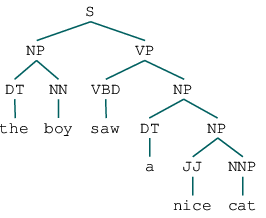

In [316]:
def generate_parse_tree(bp, start):
    '''
    Recursively construct a tree
    args:
        bp: backpointers that allow us to recover the highest scoring parse tree, dictionary
        start: the start node, i.e., (i, k, X), which refers to the non-terminal root X and the words span [i, k) it covers, tuple
    return:
        tree: the parse tree, nltk.tree.Tree type
    '''
    #complete the code
    
    tag = str(start[0]) + str(start[1]) + str(start[2])
    bp_info = bp[tag]
    print(bp_info)
    if len(bp_info[1]._rhs) > 1:
        sub_treel = generate_parse_tree(bp, (start[0], start[0] + bp_info[0] + 1, bp_info[1]._rhs[0]))
        sub_treer = generate_parse_tree(bp, (start[0] + bp_info[0] + 1, start[1], bp_info[1]._rhs[1]))
        return nltk.Tree(bp_info[1]._lhs, [sub_treel, sub_treer])
        #combine two subtree
    else:
        return nltk.Tree(bp_info[1]._lhs, [bp_info[1]._rhs])

s = nltk.nonterminals('S')[0]
full_tree = generate_parse_tree(bp, (0, 6, s))
full_tree

Now using the PCFG learned from Task 2, we can work on the following:
- Compute the max probability for the sentence "the boy saw a nice cat" based on "terminals", "non_terminals", "smoothed_rule_probs" obtained in Task 2.
- Generate and display the parse tree of the sentence.

In [312]:
sent = "the boy saw a nice cat".split()
pi, bp = CKY(sent, non_terminals, terminals, smoothed_grammar_rule_probs)
#Write your code to display max probability and generate the parse tree

## Evaluate Our Parser

Now we can use the CKY algorithm implemented in Task 3 to predict parse trees on sentences from the test set, then evaluate the performance based on the gold parse trees of the test set. Before we perform the evaluation, we need to represent our parse trees in a form of constituents which are denoted as brackets $X(i, j)$, where $X$ is the non-terminal symbol **that has two children**, and $i$, $j$ refers to the starting point (inclusive) and ending point (exclusive) respectively. **(In other words, a constituent cannot consist of a single word only.)**

Metrics are defined as:
- Precision = (# of correct constituents in the predicted parse trees)/(# of total constituents in the predicted parse trees)

- Recall = (# of correct constituents in the predicted parse trees)/(# of correct constituents in the gold parse trees)

- F1 score = 2\*precision\*recall/(precision+recall)

Using the sentence "Fruit flies like a banana" as example again, there are five words in the sentence with labels from 0 to 4. Assume the constituents are $S(0, 5)$, $NP(0, 2)$, $VP(2, 5)$, $NP(3, 5)$ in the gold parse tree (shown in Task 3), and $S(0, 5)$, $NP(0, 2)$, $PP(2, 5)$, $NP(3, 5)$ in the predicted parse tree (shown below). Then the precision = 3/4, the recall = 3/4, and the F1 score = 0.75. 
![parse_tree](imgs/parse_tree2.png)

### Task 4 (6 points):
- Run the CKY algorithm on the test set and generate parse trees under the smoothed PCFG obtained in Task 2. Note that some test sentences contain words that are not included in the  list "terminals", set those words as $unk$.
- Extract the constituents from the gold and predicted parse trees respectively.
- Compute the overall precision, recall and F1 score for the test set.


In [270]:
#Write your code here